# Plotting

This notebook is used to create the figures of the experiments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
plt.style.use('default')

## Original Implementation (no binning, no schedule)

In [2]:
# The compression ratios from the original paper, estimated by their provided plot.
deep_squeeze_corel = np.array([
    [0.005, 0.045],
    [0.01, 0.0297],
    [0.05, 0.017],
    [0.1, 0.009]
])

deep_squeeze_monitor = np.array([
    [0.005, 0.075],
    [0.01, 0.063],
    [0.05, 0.059],
    [0.1, 0.032]
])

In [3]:
no_bin_no_sched_results = pd.read_csv('../storage/results/NO_POST_BINNING_NO_SCHED_res_MSE_post_bin_d_2_w_2_b_VAR_cs_1_e_1.csv', index_col=0)
display(no_bin_no_sched_results)

,Data,Error,MeanRatio,StdRatio,Time
0,corel_processed.csv,0.005,0.237721,0.158274,4.01
1,corel_processed.csv,0.010,0.224174,0.188966,3.83
2,corel_processed.csv,0.050,0.183539,0.138137,3.69
3,corel_processed.csv,0.100,0.066835,0.058952,3.48
4,berkeley_processed.csv,0.005,0.057600,0.056231,10.19
5,berkeley_processed.csv,0.010,0.087933,0.054445,10.63
6,berkeley_processed.csv,0.050,0.019673,0.015554,9.49
7,berkeley_processed.csv,0.100,0.017629,0.012375,9.37
8,monitor_processed_0_2_fraction.csv,0.005,0.060138,0.044362,25.71
9,monitor_processed_0_2_fraction.csv,0.010,0.096822,0.042703,29.68


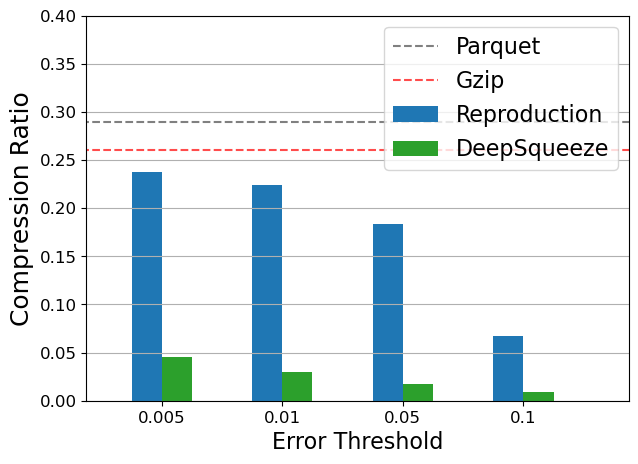

In [4]:
no_bin_no_sched_corel = no_bin_no_sched_results[no_bin_no_sched_results['Data'] == 'corel_processed.csv'].drop(['Data', 'Time'], axis=1)
# display(no_bin_no_sched_corel)

fig = plt.figure(figsize=(7,5))

x = np.arange(len(no_bin_no_sched_corel))
plt.grid(axis='y')
plt.bar(x, no_bin_no_sched_corel.MeanRatio, color="tab:blue", label="Reproduction",width = 0.25)
plt.bar(x+0.25, deep_squeeze_corel[:, 1], color="tab:green", label="DeepSqueeze",width = 0.25)
plt.hlines(0.29, -1, 5, label='Parquet', linestyles='dashed', color='gray')
plt.hlines(0.26, -1, 5, label='Gzip', linestyles='dashed', color='red', alpha=0.7)
plt.xlim(-0.5, 4)
# plt.errorbar(x, no_bin_no_sched_corel.MeanRatio, yerr=no_bin_no_sched_corel.StdRatio, fmt='.k', capsize=8, label="Std (10 repeats)")
plt.xlabel("Error Threshold", fontsize=16)
plt.ylabel("Compression Ratio", fontsize=18)
plt.xticks(x+0.125, labels=deep_squeeze_corel[:, 0], fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((0, 0.4))

plt.legend(prop={'size': 16})

plt.savefig('../storage/plots/original_corel.png', format='png', dpi=1200, bbox_inches = 'tight')
plt.show()

## With schedule

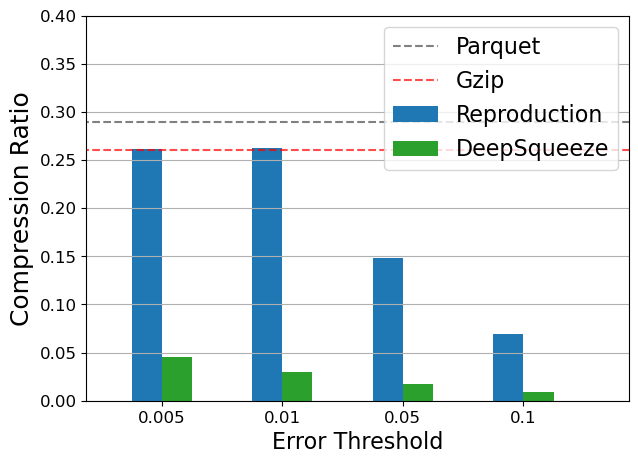

In [5]:
with_sched_results = pd.read_csv('../storage/results/NO_POST_BINNING_WITH_STEP_SCHED_res_MSE_post_bin_d_2_w_2_b_VAR_cs_1_e_1.csv', index_col=0)
with_sched_results_corel = with_sched_results[with_sched_results['Data'] == 'corel_processed.csv'].drop(['Data', 'Time'], axis=1)
# display(no_bin_no_sched_corel)

fig = plt.figure(figsize=(7,5))

x = np.arange(len(with_sched_results_corel))
plt.grid(axis='y')
plt.bar(x, with_sched_results_corel.MeanRatio, color="tab:blue", label="Reproduction",width = 0.25)
plt.bar(x+0.25, deep_squeeze_corel[:, 1], color="tab:green", label="DeepSqueeze",width = 0.25)
plt.hlines(0.29, -1, 5, label='Parquet', linestyles='dashed', color='gray')
plt.hlines(0.26, -1, 5, label='Gzip', linestyles='dashed', color='red', alpha=0.7)
plt.xlim(-0.5, 4)
plt.ylim((0, 0.4))
# plt.errorbar(x, no_bin_no_sched_corel.MeanRatio, yerr=no_bin_no_sched_corel.StdRatio, fmt='.k', capsize=8, label="Std (10 repeats)")
plt.xlabel("Error Threshold", fontsize=16)
plt.ylabel("Compression Ratio", fontsize=18)
plt.xticks(x+0.125, labels=deep_squeeze_corel[:, 0], fontsize=12)
plt.yticks(fontsize=12)

plt.legend(prop={'size': 16})

plt.savefig('../storage/plots/with_sched_corel.png', format='png', dpi=1200, bbox_inches = 'tight')
plt.show()

## With post-binning

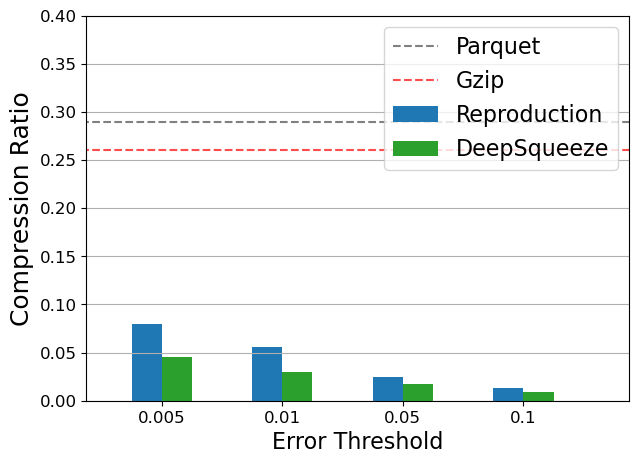

In [6]:
with_bin_results = pd.read_csv('../storage/results/WITH_POST_BINNING_NO_SCHED_res_MSE_post_bin_d_2_w_2_b_VAR_cs_1_e_1.csv', index_col=0)
with_bin_results_corel = with_bin_results[with_bin_results['Data'] == 'corel_processed.csv'].drop(['Data', 'Time'], axis=1)
# display(no_bin_no_sched_corel)

fig = plt.figure(figsize=(7,5))

x = np.arange(len(with_bin_results_corel))
plt.grid(axis='y')
plt.bar(x, with_bin_results_corel.MeanRatio, color="tab:blue", label="Reproduction",width = 0.25)
plt.bar(x+0.25, deep_squeeze_corel[:, 1], color="tab:green", label="DeepSqueeze",width = 0.25)
plt.hlines(0.29, -1, 5, label='Parquet', linestyles='dashed', color='gray')
plt.hlines(0.26, -1, 5, label='Gzip', linestyles='dashed', color='red', alpha=0.7)
plt.xlim(-0.5, 4)
plt.ylim((0, 0.4))
plt.xlabel("Error Threshold", fontsize=16)
plt.ylabel("Compression Ratio", fontsize=18)
plt.xticks(x+0.125, labels=deep_squeeze_corel[:, 0], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(prop={'size': 16})

plt.savefig('../storage/plots/with_bin_corel.png', format='png', dpi=1200, bbox_inches = 'tight')
plt.show()

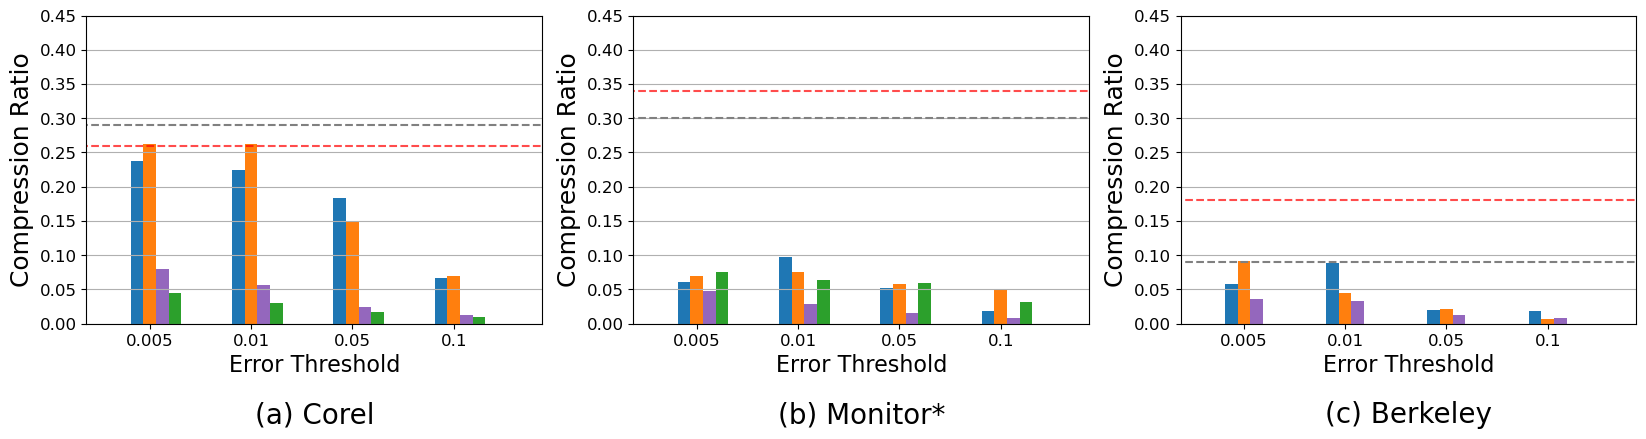

In [7]:
dataset_names = ['corel_processed.csv', 'monitor_processed_0_2_fraction.csv', 'berkeley_processed.csv']
title_names = ["(a) Corel", "(b) Monitor*", "(c) Berkeley"]
no_bin_no_sched_results = pd.read_csv('../storage/results/NO_POST_BINNING_NO_SCHED_res_MSE_post_bin_d_2_w_2_b_VAR_cs_1_e_1.csv', index_col=0)
with_sched_results = pd.read_csv('../storage/results/NO_POST_BINNING_WITH_STEP_SCHED_res_MSE_post_bin_d_2_w_2_b_VAR_cs_1_e_1.csv', index_col=0)
with_bin_results = pd.read_csv('../storage/results/WITH_POST_BINNING_NO_SCHED_res_MSE_post_bin_d_2_w_2_b_VAR_cs_1_e_1.csv', index_col=0)
implementations = [["Original", no_bin_no_sched_results], ["Loss Schedule", with_sched_results], ["Post Binning", with_bin_results]]
colors = ["tab:blue", "tab:orange", "tab:purple"]

fig = plt.figure(figsize=(20,4))

for ind, data_name in enumerate(dataset_names, start=1):
    plt.subplot(1, 3, ind)

    x = np.arange(4)
    plt.grid(axis='y')

    for which_imp, (imp_name, imp) in enumerate(implementations):
        plt.bar(x+which_imp*0.125, 
                imp[imp.Data==data_name].MeanRatio, 
                label="imp_name", width = 0.125, color=colors[which_imp])
        
    plt.xlabel("Error Threshold", fontsize=16)
    plt.ylabel("Compression Ratio", fontsize=18)
    
    if data_name=="corel_processed.csv":
        plt.bar(x+3*0.125, deep_squeeze_corel[:, 1], label="DeepSqueeze",width = 0.125, color="tab:green")
        plt.hlines(0.29, -1, 5, label='Parquet', linestyles='dashed', color='gray')
        plt.hlines(0.26, -1, 5, label='Gzip', linestyles='dashed', color='red', alpha=0.7)
    elif data_name=="monitor_processed_0_2_fraction.csv":
        plt.bar(x+3*0.125, deep_squeeze_monitor[:, 1], label="DeepSqueeze",width = 0.125, color="tab:green")
        plt.hlines(0.30, -1, 5, label='Parquet', linestyles='dashed', color='gray')
        plt.hlines(0.34, -1, 5, label='Gzip', linestyles='dashed', color='red', alpha=0.7)
    else:
        plt.hlines(0.09, -1, 5, label='Parquet', linestyles='dashed', color='gray')
        plt.hlines(0.18, -1, 5, label='Gzip', linestyles='dashed', color='red', alpha=0.7)

    plt.xticks(x+0.125, labels=deep_squeeze_corel[:, 0], fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0, 0.45))
    plt.xlim(-0.5, 4)
#     plt.legend(prop={'size': 16})
    plt.title(title_names[ind-1], y=-0.35, fontsize=20)

# plt.tight_layout()
plt.savefig('../storage/plots/full_results.png', format='png', dpi=1200, bbox_inches = 'tight')
plt.show()



## Scalability experiments

,SampleSize,DeepSqueeze,Gzip,Parquet
0,0.2,9.61,17.25,5.40
1,0.4,12.87,34.79,11.83
2,0.6,15.34,52.24,18.37
3,0.8,18.09,69.11,25.31
4,1.0,21.67,87.27,31.43


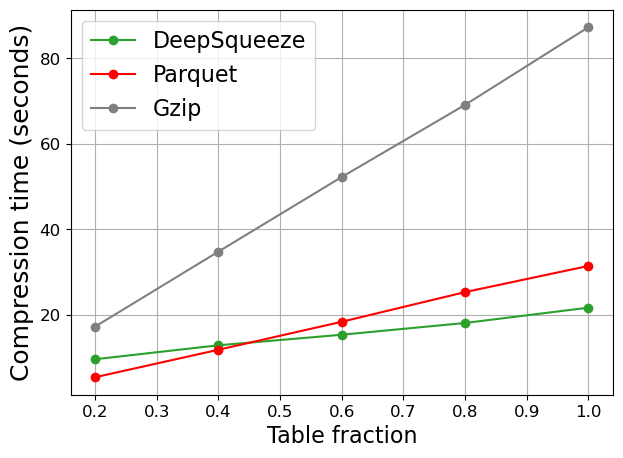

In [8]:
time_df = pd.read_csv('../storage/results/TIME_SCALING_EXPERIMENTS.csv', index_col=0)
display(time_df)

fig = plt.figure(figsize=(7,5))
x = time_df.SampleSize

plt.plot(x, time_df.DeepSqueeze, label="DeepSqueeze", marker='o', color='tab:green')
plt.plot(x, time_df.Parquet, label="Parquet", marker='o', color='red')
plt.plot(x, time_df.Gzip, label="Gzip", marker='o', color='gray')
plt.legend(prop={'size': 16})

plt.xlabel("Table fraction", fontsize=16)
plt.ylabel("Compression time (seconds)", fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()

plt.savefig('../storage/plots/time_scaling.png', format='png', dpi=1200, bbox_inches = 'tight')
plt.show()